# 第12章：利用Matplotlib、Pandas和Seaborn進行資料視覺化

## 12.1 Matplotlib入門

In [32]:
%matplotlib inline

## 12.2 Matplotlib的物件導向指南

Text(0.5, 1.03, 'Figure Title')

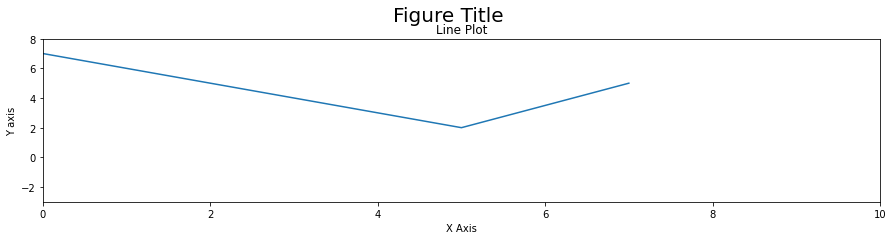

In [33]:
import matplotlib.pyplot as plt

x = [-3, 5, 7]
y = [10, 2, 5]
fig = plt.figure(figsize=(15, 3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

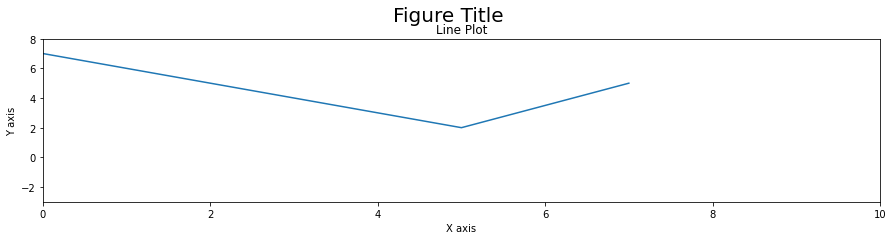

In [34]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.core.display import display

fig = Figure(figsize=(15, 3))
FigureCanvas(fig)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)
display(fig)

Text(0.5, 1.03, 'Figure Title')

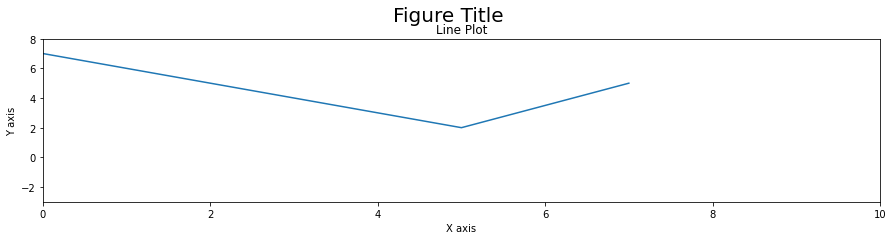

In [35]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x, y)
ax.set(xlim=(0, 10),
       ylim=(-3, 8),
       xlabel='X axis',
       ylabel='Y axis',
       title='Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

In [36]:
import matplotlib.pyplot as plt

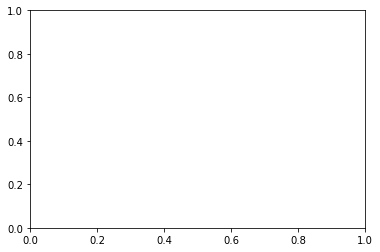

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1)

tuple

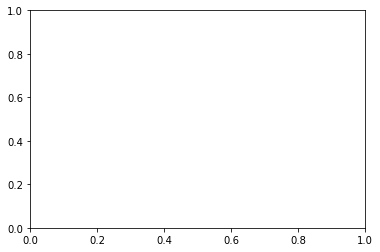

In [38]:
plot_objects = plt.subplots(nrows=1, ncols=1)
type(plot_objects)

In [39]:
fig = plot_objects[0]
ax = plot_objects[1]

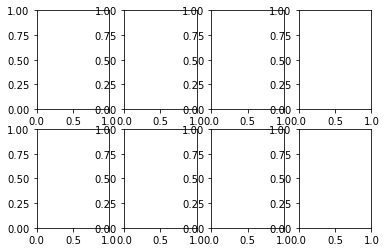

In [40]:
figs, axs = plt.subplots(2, 4)

In [41]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

In [42]:
type(fig)

matplotlib.figure.Figure

In [43]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [44]:
fig.get_size_inches()

array([6., 4.])

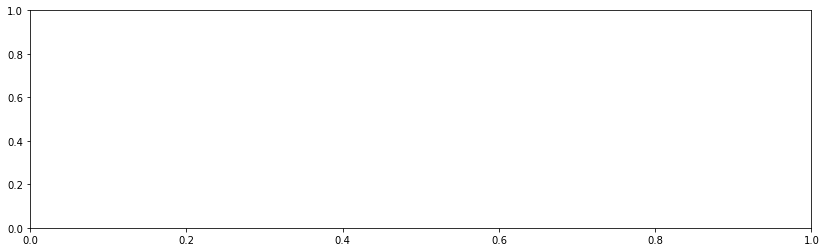

In [45]:
fig.set_size_inches(14, 4)
fig

In [46]:
fig.axes

[<AxesSubplot:>]

In [47]:
ax.xaxis == ax.get_xaxis()

True

In [48]:
ax.yaxis == ax.get_yaxis()

True

In [49]:
fig.axes[0] is ax

True

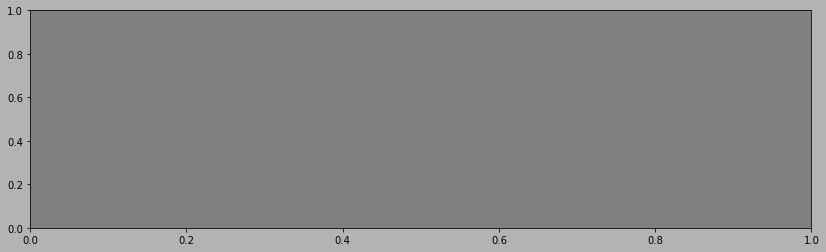

In [50]:
fig.set_facecolor('.7')
ax.set_facecolor('.5')
fig

In [51]:
ax_children = ax.get_children()
ax_children

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [52]:
spines = ax.spines
spines

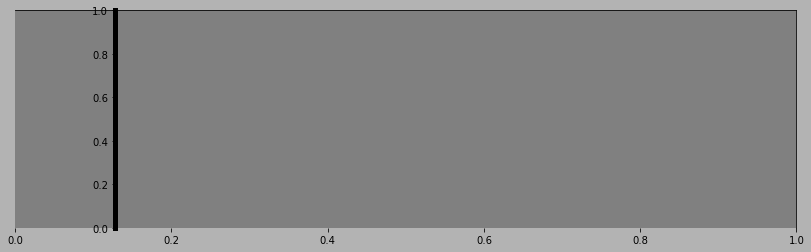

In [53]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

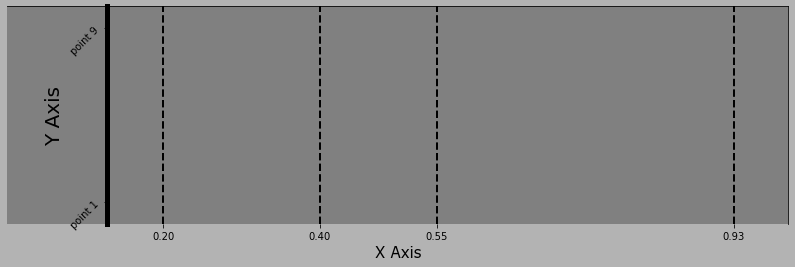

In [54]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)
ax.set_ylabel('Y Axis', family='Gotham', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

In [55]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 22.200000000000003, 'X Axis'),
  Text(1, 23.200000000000003, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x1cdaa7864c0>,
 'clip_on': True,
 'clip_path': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 1008x288 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 4 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 22.200000000000003, 'X Axis'),
 'label_position': 'bottom',
 'label_text': 'X Axis',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x1cdaa753040>,
 'major_locator': <matplotlib.ticker.FixedLocator at 0x1cdaba0ee20>,
 'major_ticks': [<matplotlib.axis.XTick at 0x1cdaa7316a0>,
 'majorticklabels': [Text(0.2, 0, '0.20'),
  Text(0.4, 0, '0.40'),
  Text(0.55, 0, '0.55'),
  Text(0.93, 0, '0.93')],
 'majorticklines': <a list of 8 Line2D ticklines objects>,
 'majorticklocs': array([0.2 , 0.4 , 0.55, 0.93]),
 'minor_formatte

## 12.3 用Matplotlib視覺化資料

In [56]:
pwd

'D:\\OneDrive\\BOOKS\\PY_PANDAS\\Pandas資料清理重塑過濾視覺化_旗標\\ch12'

In [57]:
!dir /b

.ipynb_checkpoints
data
F1369_CH12.html
F1369_CH12.ipynb
PT_F1369_CH12.ipynb


In [58]:
import pandas as pd
import numpy as np

# pd.set_option('max_columns', 6, 'max_rows', 10, 'max_colwidth', 12)

alta = pd.read_csv('data/alta-noaa-1980-2019.csv')
# alta = pd.read_excel('data/alta-noaa-1980-2019.xlsx')
alta

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-03,NaN,NaN,NaN,NaN,...,0.0,74.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
14156,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-04,NaN,NaN,NaN,NaN,...,0.0,77.0,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
14157,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-05,NaN,NaN,NaN,NaN,...,0.0,76.0,54.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
14158,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-06,NaN,NaN,NaN,NaN,...,0.0,66.0,52.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data = (alta.assign(DATE=pd.to_datetime(alta.DATE)).set_index(
    'DATE').loc['2018-09':'2019-08'].SNWD)
data

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
             ... 
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, Length: 364, dtype: float64

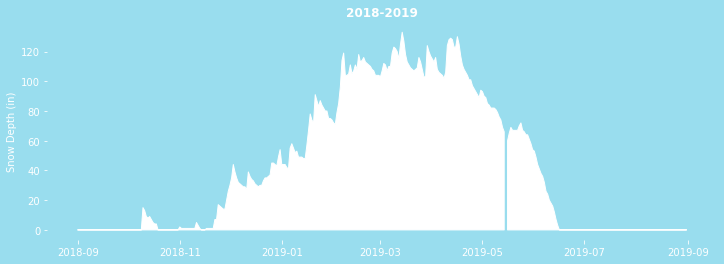

In [60]:
blue = '#99ddee'
white = '#ffffff'
fig, ax = plt.subplots(figsize=(12, 4), linewidth=5, facecolor=blue)
ax.set_facecolor(blue)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='x', colors=white)
ax.tick_params(axis='y', colors=white)
ax.set_ylabel('Snow Depth (in)', color=white)
ax.set_title('2018-2019', color=white, fontweight='bold')
ax.fill_between(data.index, data, color=white)

In [61]:
import matplotlib.dates as mdt

blue = '#99ddee'
white = '#ffffff'

In [62]:
def plot_year(ax, data, years):
  ax.set_facecolor(blue)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(axis='x', colors=white)
  ax.tick_params(axis='y', colors=white)
  ax.set_ylabel('Snow Depth (in)', color=white)
  ax.set_title(years, color=white, fontweight='bold')
  ax.fill_between(data.index, data, color=white)

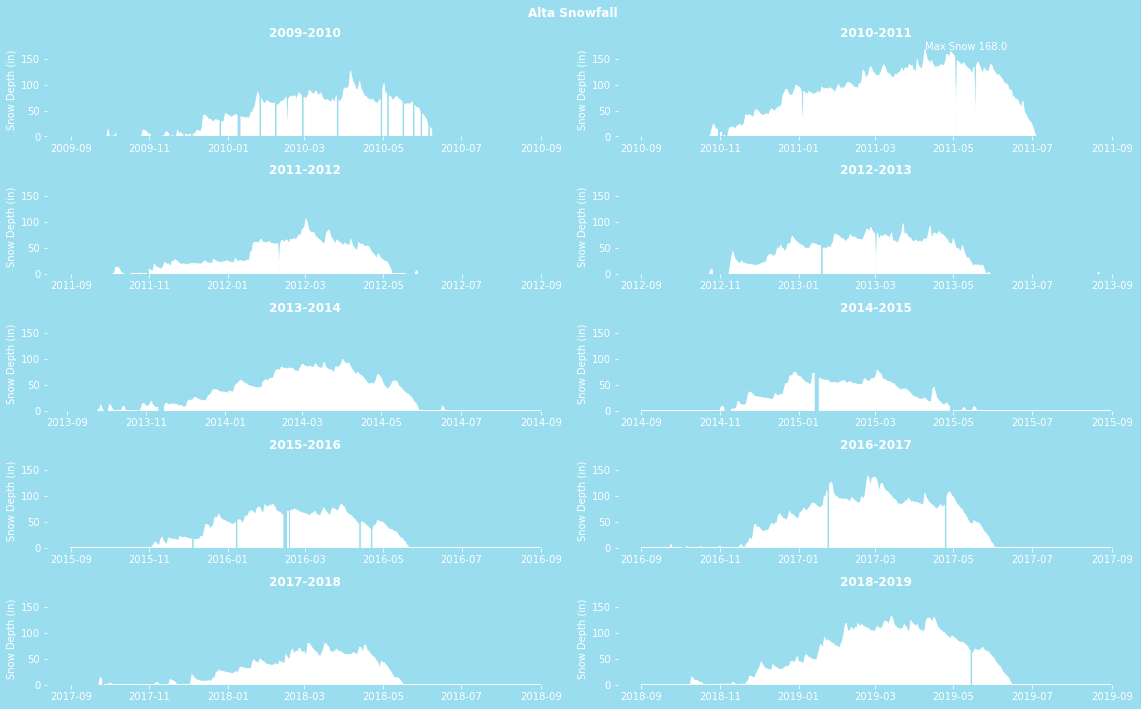

In [63]:
years = range(2009, 2019)
fig, axs = plt.subplots(ncols=2,
                        nrows=int(len(years) / 2),
                        figsize=(16, 10),
                        linewidth=5,
                        facecolor=blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):
  ax = axs[i]
  data = (alta.assign(DATE=pd.to_datetime(alta.DATE)).set_index(
      'DATE').loc[f'{y}-09':f'{y+1}-08'].SNWD)
  if max_val is None or max_val < data.max():
    max_val = data.max()
    max_data = data
    max_ax = ax
  ax.set_ylim(0, 180)
  years = f'{y}-{y+1}'
  plot_year(ax, data, years)
max_ax.annotate(f'Max Snow {max_val}',
                xy=(mdt.date2num(max_data.idxmax()), max_val),
                color=white)

fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout()

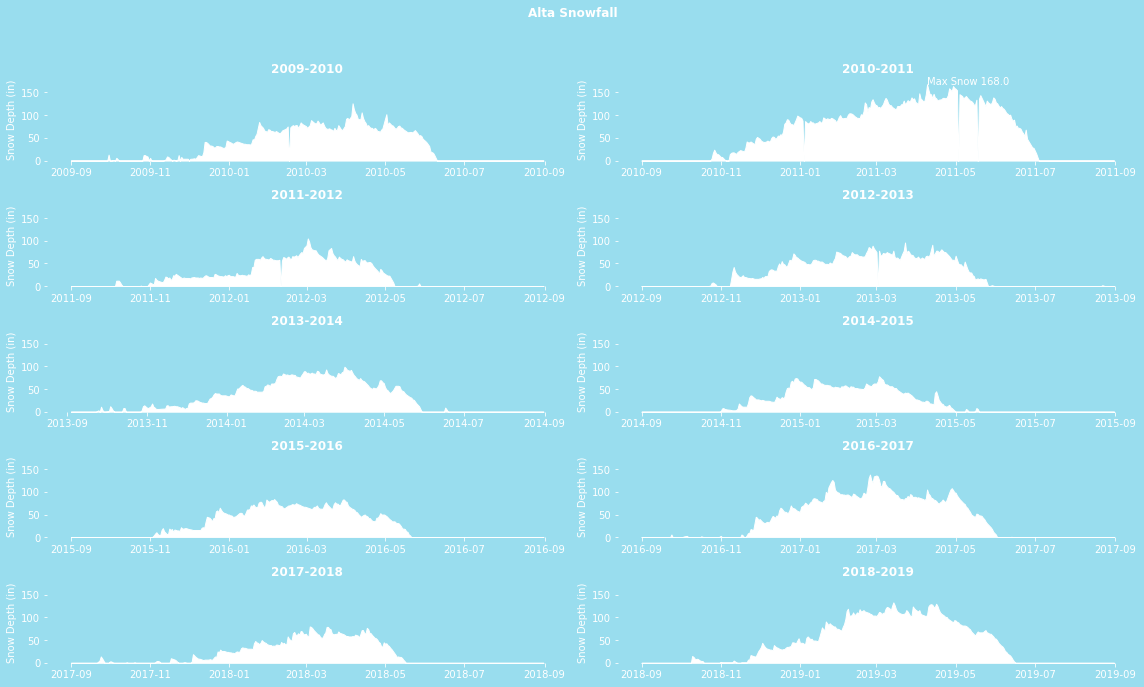

In [64]:
years = range(2009, 2019)
fig, axs = plt.subplots(ncols=2,
                        nrows=int(len(years) / 2),
                        figsize=(16, 10),
                        linewidth=5,
                        facecolor=blue)
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):
  ax = axs[i]
  data = (alta.assign(DATE=pd.to_datetime(alta.DATE)).set_index(
      'DATE').loc[f'{y}-09':f'{y+1}-08'].SNWD.interpolate())
  if max_val is None or max_val < data.max():
    max_val = data.max()
    max_data = data
    max_ax = ax
  ax.set_ylim(0, 180)
  years = f'{y}-{y+1}'
  plot_year(ax, data, years)
max_ax.annotate(f'Max Snow {max_val}',
                xy=(mdt.date2num(max_data.idxmax()), max_val),
                color=white)
plt.tight_layout()

fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [65]:
(alta.assign(
    DATE=pd.to_datetime(alta.DATE)).set_index('DATE').SNWD.to_frame().assign(
        next=lambda df_: df_.SNWD.shift(-1),
        snwd_diff=lambda df_: df_.next - df_.SNWD).pipe(
            lambda df_: df_[df_.snwd_diff.abs() > 50]))

,SNWD,next,snwd_diff
DATE,,,
1989-11-27,60.0,0.0,-60.0
2007-02-28,87.0,9.0,-78.0
2008-05-22,62.0,0.0,-62.0
2008-05-23,0.0,66.0,66.0
2009-01-16,76.0,0.0,-76.0
2009-01-17,0.0,70.0,70.0
2009-05-14,52.0,0.0,-52.0
2009-05-15,0.0,51.0,51.0
2009-05-17,55.0,0.0,-55.0


In [66]:
def fix_gaps(ser, threshold=50):
  'Replace values where the shift is > threshold with nan'
  mask = (ser.to_frame().assign(
      next=lambda df_: df_.SNWD.shift(-1),
      snwd_diff=lambda df_: df_.next - df_.SNWD).pipe(
          lambda df_: df_.snwd_diff.abs() > threshold))
  return ser.where(~mask, np.nan)

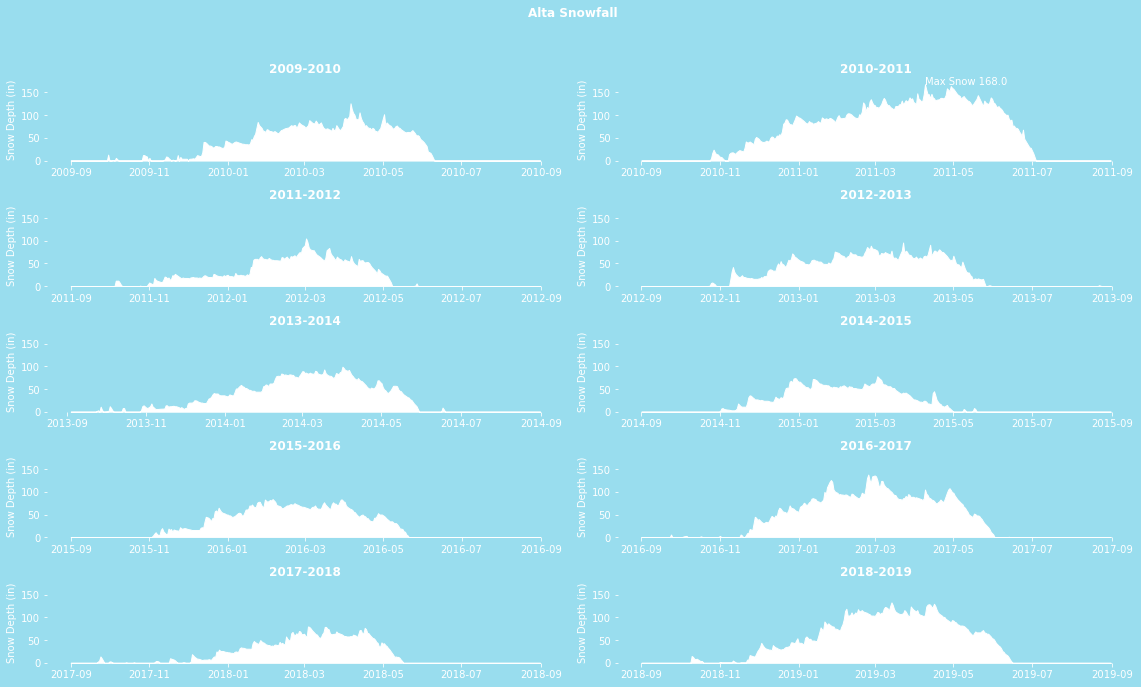

In [67]:
years = range(2009, 2019)
fig, axs = plt.subplots(ncols=2,
                        nrows=int(len(years) / 2),
                        figsize=(16, 10),
                        linewidth=5,
                        facecolor=blue)
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):
  ax = axs[i]
  data = (alta.assign(DATE=pd.to_datetime(alta.DATE)).set_index(
      'DATE').loc[f'{y}-09':f'{y+1}-08'].SNWD.pipe(fix_gaps).interpolate())
  if max_val is None or max_val < data.max():
    max_val = data.max()
    max_data = data
    max_ax = ax
  ax.set_ylim(0, 180)
  years = f'{y}-{y+1}'
  plot_year(ax, data, years)
max_ax.annotate(f'Max Snow {max_val}',
                xy=(mdt.date2num(max_data.idxmax()), max_val),
                color=white)

fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### 小編補充

In [68]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [69]:
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [70]:
s = pd.Series(range(5))
t = s > 0
t

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [71]:
s.where(t)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

## 12.4 使用Pandas繪製基本圖形

In [72]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
                  data={
                      'Apples': [20, 10, 40, 20, 50],
                      'Oranges': [35, 40, 25, 19, 33]
                  })

In [73]:
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


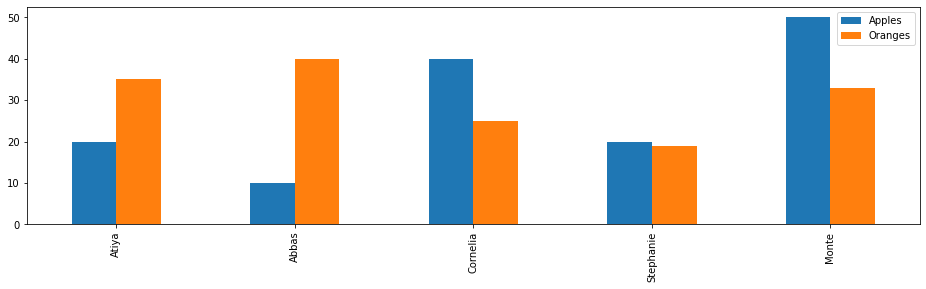

In [74]:
ax = df.plot.bar(figsize=(16, 4))

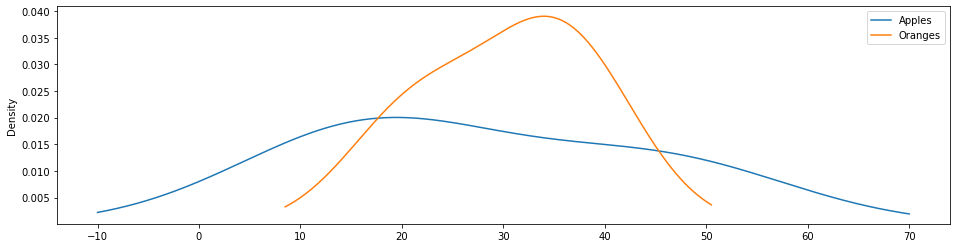

In [75]:
ax = df.plot.kde(figsize=(16, 4))

<AxesSubplot:title={'center':'Bar plot'}>

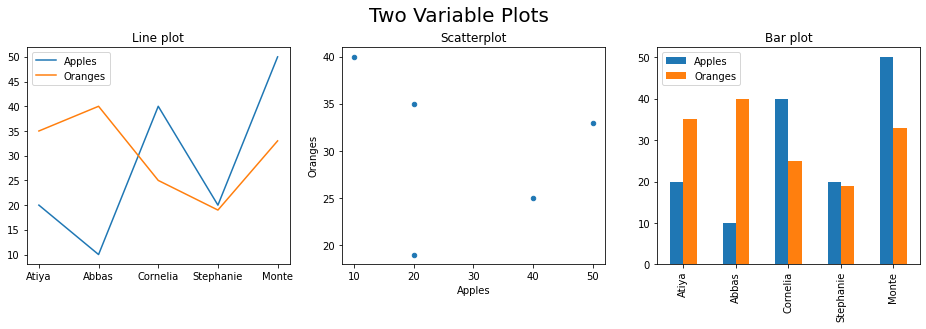

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot.line(ax=ax1, title='Line plot')
df.plot.scatter(x='Apples', y='Oranges', ax=ax2, title='Scatterplot')
df.plot.bar(ax=ax3, title='Bar plot')

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

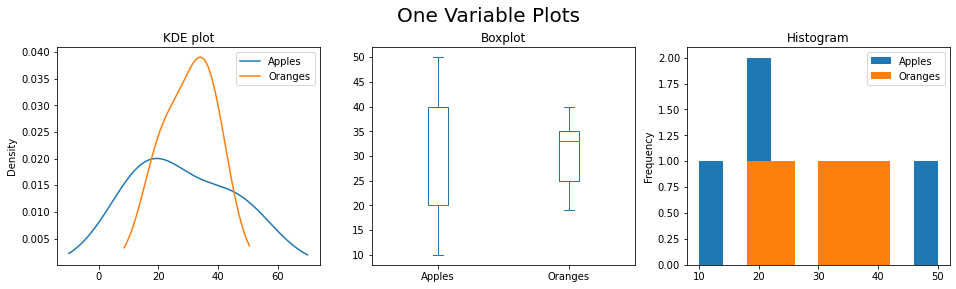

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot.kde(ax=ax1, title='KDE plot')
df.plot.box(ax=ax2, title='Boxplot')
df.plot.hist(ax=ax3, title='Histogram')

<AxesSubplot:ylabel='Density'>

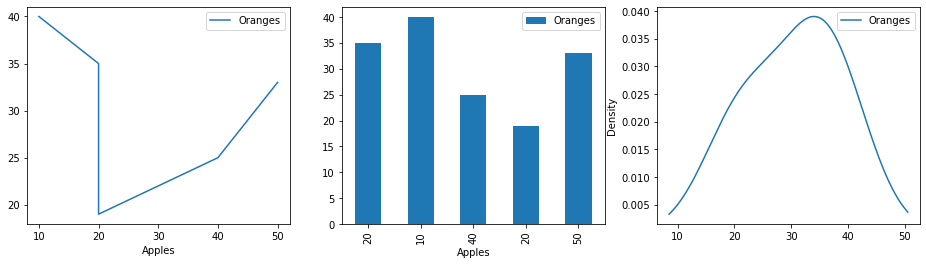

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
df.sort_values('Apples').plot.line(x='Apples', y='Oranges', ax=ax1)
df.plot.bar(x='Apples', y='Oranges', ax=ax2)
df.plot.kde(x='Apples', ax=ax3)

## 12.5 視覺化航班資料集

In [80]:
flights = pd.read_csv('data/flights.csv')

In [81]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
(flights.assign(
    DELAYED=flights['ARR_DELAY'].ge(15).astype(int),
    ON_TIME=lambda df_: 1 - df_[cols].any(axis=1)).select_dtypes(int).sum())

MONTH          363858
DAY            918447
WEEKDAY        229690
SCHED_DEP    81186009
DIST         51057671
SCHED_ARR    90627495
DIVERTED          137
CANCELLED         881
DELAYED         11685
ON_TIME         45789
dtype: int64

<AxesSubplot:title={'center':'Arrival Delay'}, ylabel='Frequency'>

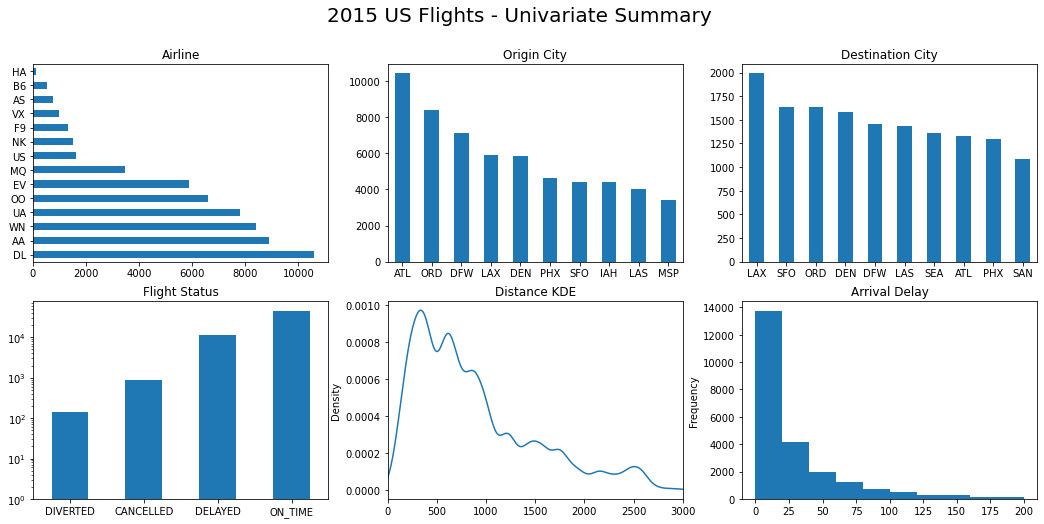

In [82]:
fig, ax_array = plt.subplots(2, 3, figsize=(18, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)
ac = flights['AIRLINE'].value_counts()
ac.plot.barh(ax=ax1, title='Airline')
(flights['ORG_AIR'].value_counts().plot.bar(ax=ax2, rot=0,
                                            title='Origin City'))
(flights['DEST_AIR'].value_counts().head(10).plot.bar(
    ax=ax3, rot=0, title='Destination City'))
(flights.assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int),
                ON_TIME=lambda df_: 1 - df_[cols].any(axis=1))[[
                    'DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME'
                ]].sum().plot.bar(ax=ax4,
                                  rot=0,
                                  log=True,
                                  title='Flight Status'))
flights['DIST'].plot.kde(ax=ax5, xlim=(0, 3000), title='Distance KDE')
flights['ARR_DELAY'].plot.hist(ax=ax6, title='Arrival Delay', range=(0, 200))

In [83]:
df_date = (flights[['MONTH', 'DAY']].assign(YEAR=2015,
                                            HOUR=flights['SCHED_DEP'] // 100,
                                            MINUTE=flights['SCHED_DEP'] % 100))
df_date

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20
...,...,...,...,...,...
58487,12,31,2015,5,15
58488,12,31,2015,19,10
58489,12,31,2015,18,46
58490,12,31,2015,5,25


In [84]:
flight_dep = pd.to_datetime(df_date)
flight_dep

0       2015-01-01 16:25:00
1       2015-01-01 08:23:00
2       2015-01-01 13:05:00
3       2015-01-01 15:55:00
4       2015-01-01 17:20:00
                ...        
58487   2015-12-31 05:15:00
58488   2015-12-31 19:10:00
58489   2015-12-31 18:46:00
58490   2015-12-31 05:25:00
58491   2015-12-31 08:59:00
Length: 58492, dtype: datetime64[ns]

<AxesSubplot:title={'center':'Flights per Week'}>

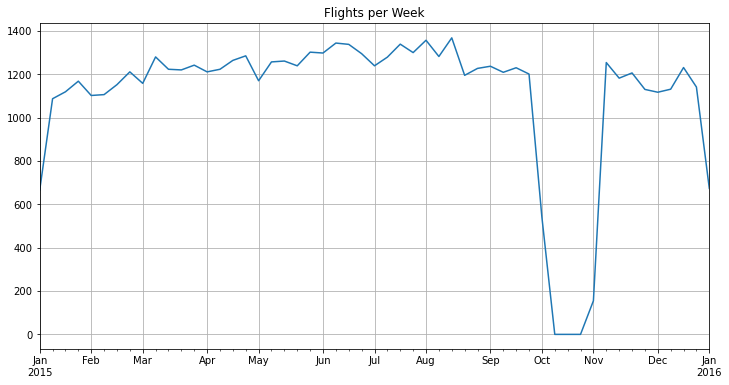

In [85]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot.line(figsize=(12, 6), title='Flights per Week', grid=True)

Text(0.5, 1.0, 'Flights per Week (Interpolated Missing Data)')

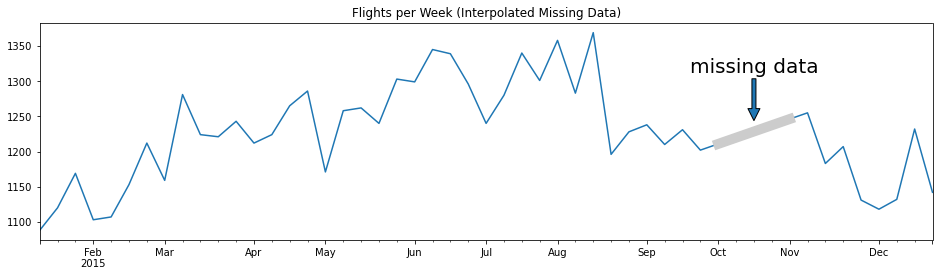

In [88]:
def interp_lt_n(df_, n=600):
  return (df_.where(df_ > n).interpolate(limit_direction='both'))


fig, ax = plt.subplots(figsize=(16, 4))
data = (flights.resample('W').size())
(data.pipe(interp_lt_n).iloc[1:-1].plot.line(ax=ax))
mask = data < 600
(data.pipe(interp_lt_n)[mask].plot.line(color='.8', linewidth=10))
ax.annotate(xy=(.8, .55),
            xytext=(.8, .77),
            xycoords='axes fraction',
            text='missing data',
            ha='center',
            size=20,
            arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)')

<AxesSubplot:title={'center':'Average Distance per Destination'}, xlabel='DEST_AIR'>

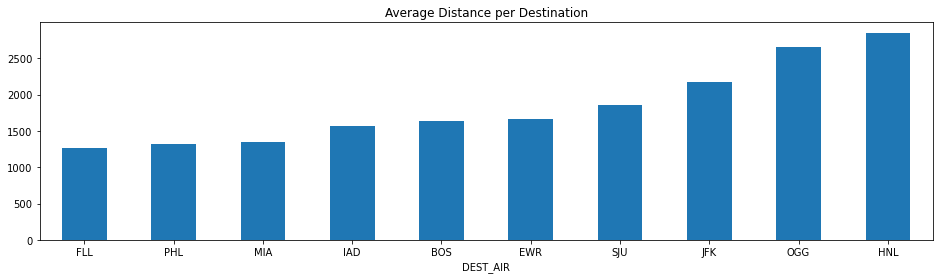

In [89]:
fig, ax = plt.subplots(figsize=(16, 4))
(flights.groupby('DEST_AIR')['DIST'].agg(
    ['mean',
     'count']).query('count > 100').sort_values('mean').tail(10).plot.bar(
         y='mean',
         rot=0,
         legend=False,
         ax=ax,
         title='Average Distance per Destination'))

<AxesSubplot:xlabel='DIST', ylabel='AIR_TIME'>

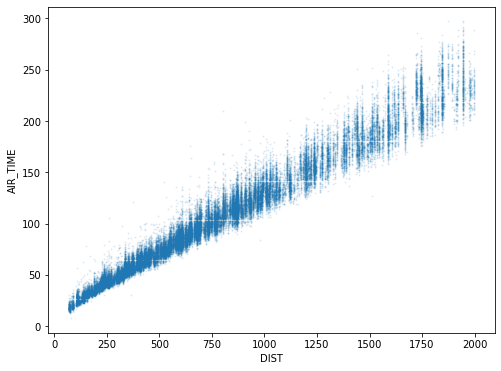

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))
(flights.reset_index(drop=True)[[
    'DIST', 'AIR_TIME'
]].query('DIST <= 2000').dropna().plot.scatter(x='DIST',
                                               y='AIR_TIME',
                                               ax=ax,
                                               alpha=.1,
                                               s=1))

In [91]:
flights[['DIST', 'AIR_TIME']].corr()

,DIST,AIR_TIME
DIST,1.00000,0.98774
AIR_TIME,0.98774,1.00000


In [92]:
(flights.reset_index(drop=True)[[
    'DIST', 'AIR_TIME'
]].query('DIST <= 2000').dropna().pipe(lambda df_: pd.cut(
    df_.DIST, bins=range(0, 2001, 250))).value_counts().sort_index())

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST, dtype: int64

In [93]:
zscore = lambda x: (x - x.mean()) / x.std()
short = (flights[[
    'DIST', 'AIR_TIME'
]].query('DIST <= 2000').dropna().reset_index(drop=True).assign(
    BIN=lambda df_: pd.cut(df_.DIST, bins=range(0, 2001, 250))))

scores = (short.groupby('BIN')['AIR_TIME'].transform(zscore))
(short.assign(SCORE=scores))

,DIST,AIR_TIME,BIN,SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999
...,...,...,...,...
53462,1464,166.0,"(1250, 1500]",-0.521999
53463,414,71.0,"(250, 500]",1.376879
53464,262,46.0,"(250, 500]",-1.255719
53465,907,124.0,"(750, 1000]",0.495005


Text(0.5, 1.0, 'Z-Scores for Distance Groups')

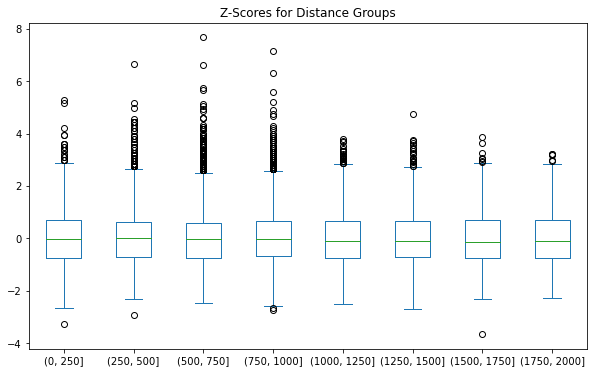

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))
(short.assign(SCORE=scores).pivot(columns='BIN')['SCORE'].plot.box(ax=ax))
ax.set_title('Z-Scores for Distance Groups')

In [95]:
mask = (short.assign(SCORE=scores).pipe(lambda df_: df_.SCORE.abs() > 6))

In [96]:
outliers = (flights[[
    'DIST', 'AIR_TIME'
]].query('DIST <= 2000').dropna().reset_index(drop=True)[mask].assign(
    PLOT_NUM=lambda df_: range(1,
                               len(df_) + 1)))

In [97]:
outliers

,DIST,AIR_TIME,PLOT_NUM
14972,373,121.0,1
22507,907,199.0,2
40768,643,176.0,3
50141,651,164.0,4
52699,802,210.0,5


Text(0.5, 1.0, 'Flight Time vs Distance with Outliers')

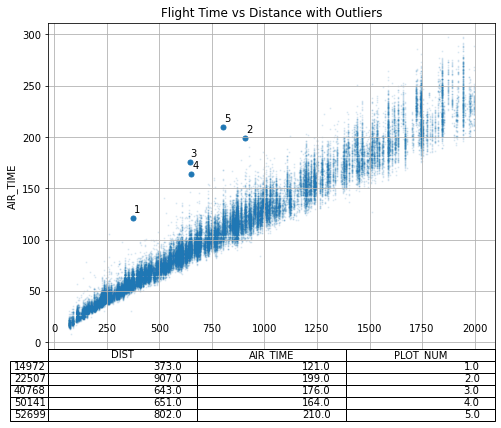

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))
(short.assign(SCORE=scores).plot.scatter(x='DIST',
                                         y='AIR_TIME',
                                         alpha=.1,
                                         s=1,
                                         ax=ax,
                                         table=outliers))
outliers.plot.scatter(x='DIST', y='AIR_TIME', s=25, ax=ax, grid=True)
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index=False):
  ax.text(d + 5, t + 5, str(n))
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')

## 12.6 使用堆疊面積圖找出趨勢

In [103]:
meetup = pd.read_csv('data/meetup_groups.csv',
                     parse_dates=['join_date'],
                     index_col='join_date')
meetup

,group,city,state,country
join_date,,,,
2016-11-18,houston machine learning,Houston,TX,us
2017-05-09,houston machine learning,Houston,TX,us
2016-12-30,houston machine learning,Houston,TX,us
2016-07-18,houston machine learning,Houston,TX,us
2017-05-25,houston machine learning,Houston,TX,us
...,...,...,...,...
2017-10-07,houston data visualization,Houston,TX,us
2017-06-24,houston data visualization,Houston,TX,us
2015-10-05,houston data visualization,Houston,TX,us


In [104]:
(meetup.groupby([pd.Grouper(freq='W'), 'group']).size())

join_date   group                       
2010-11-07  houstonr                         5
2010-11-14  houstonr                        11
2010-11-21  houstonr                         2
2010-12-05  houstonr                         1
2011-01-16  houstonr                         2
                                            ..
2017-10-15  houston data science            14
            houston data visualization      13
            houston energy data science      9
            houston machine learning        11
            houstonr                         2
Length: 763, dtype: int64

In [105]:
(meetup.groupby([pd.Grouper(freq='W'), 'group']).size().unstack('group',
                                                                fill_value=0))

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,11
2010-11-21,0,0,0,0,2
2010-12-05,0,0,0,0,1
2011-01-16,0,0,0,0,2
...,...,...,...,...,...
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1


In [106]:
(meetup.groupby([pd.Grouper(freq='W'),
                 'group']).size().unstack('group', fill_value=0).cumsum())

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,16
2010-11-21,0,0,0,0,18
2010-12-05,0,0,0,0,19
2011-01-16,0,0,0,0,21
...,...,...,...,...,...
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064


In [107]:
(meetup.groupby([pd.Grouper(freq='W'), 'group']).size().unstack(
    'group', fill_value=0).cumsum().pipe(
        lambda df_: df_.div(df_.sum(axis='columns'), axis='index')))

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-14,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-21,0.000000,0.000000,0.000000,0.000000,1.000000
2010-12-05,0.000000,0.000000,0.000000,0.000000,1.000000
2011-01-16,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481


Text(0.86, 0.78, 'Machine Learning')

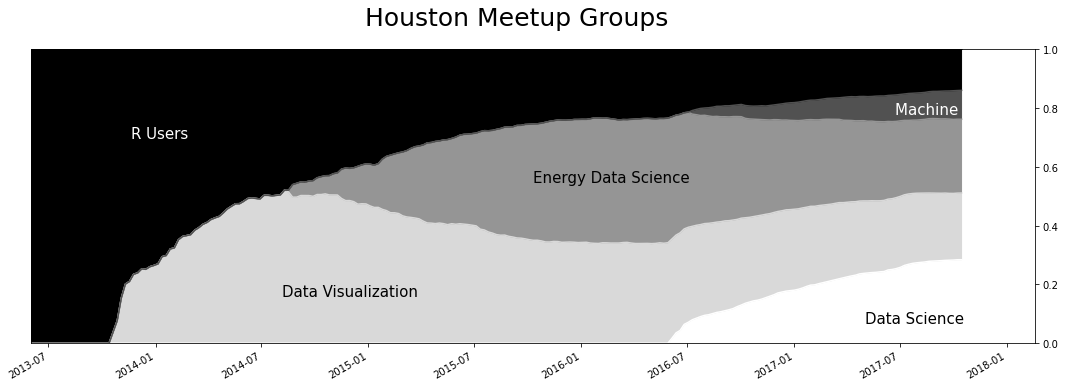

In [109]:
fig, ax = plt.subplots(figsize=(18, 6))
(meetup.groupby([pd.Grouper(freq='W'), 'group']).size().unstack(
    'group', fill_value=0).cumsum().pipe(
        lambda df_: df_.div(df_.sum(axis='columns'), axis='index')).plot.area(
            ax=ax,
            cmap='Greys',
            xlim=('2013-6', None),
            ylim=(0, 1),
            legend=False))
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()
kwargs = {'xycoords': 'axes fraction', 'size': 15}
ax.annotate(xy=(.1, .7), text='R Users', color='w', **kwargs)
ax.annotate(xy=(.25, .16), text='Data Visualization', color='k', **kwargs)
ax.annotate(xy=(.5, .55), text='Energy Data Science', color='k', **kwargs)
ax.annotate(xy=(.83, .07), text='Data Science', color='k', **kwargs)
ax.annotate(xy=(.86, .78), text='Machine Learning', color='w', **kwargs)

## 12.7 了解Seaborn和Pandas之間的區別

In [111]:
employee = pd.read_csv('data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [112]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='DEPARTMENT'>

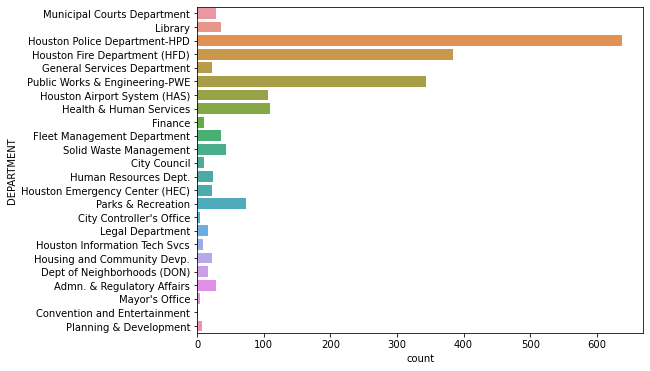

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y='DEPARTMENT', data=employee, ax=ax)

<AxesSubplot:>

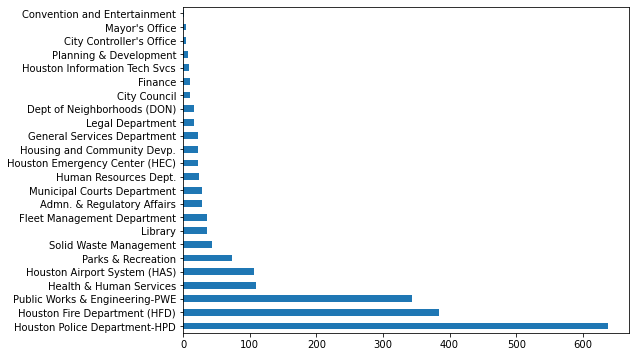

In [114]:
fig, ax = plt.subplots(figsize=(8, 6))
(employee['DEPARTMENT'].value_counts().plot.barh(ax=ax))

<AxesSubplot:xlabel='BASE_SALARY', ylabel='RACE'>

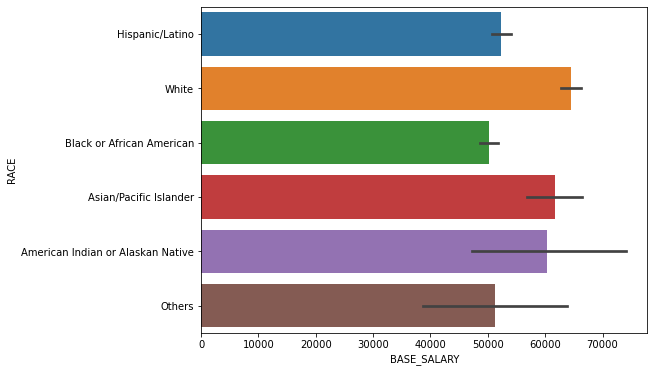

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y='RACE', x='BASE_SALARY', data=employee, ax=ax)

Text(0.5, 0, 'Mean Salary')

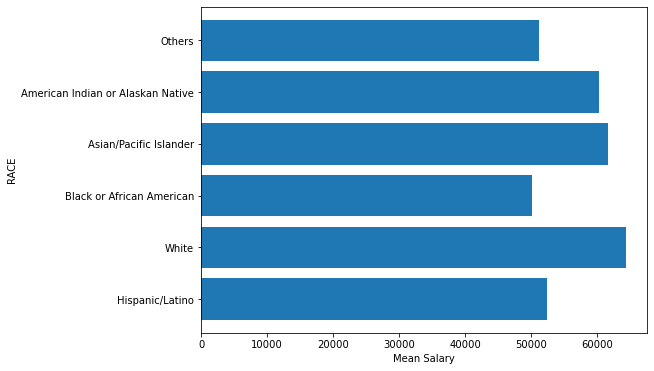

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))
(employee.groupby('RACE', sort=False)['BASE_SALARY'].mean().plot.barh(rot=0,
                                                                      width=.8,
                                                                      ax=ax))
ax.set_xlabel('Mean Salary')

<AxesSubplot:xlabel='RACE', ylabel='BASE_SALARY'>

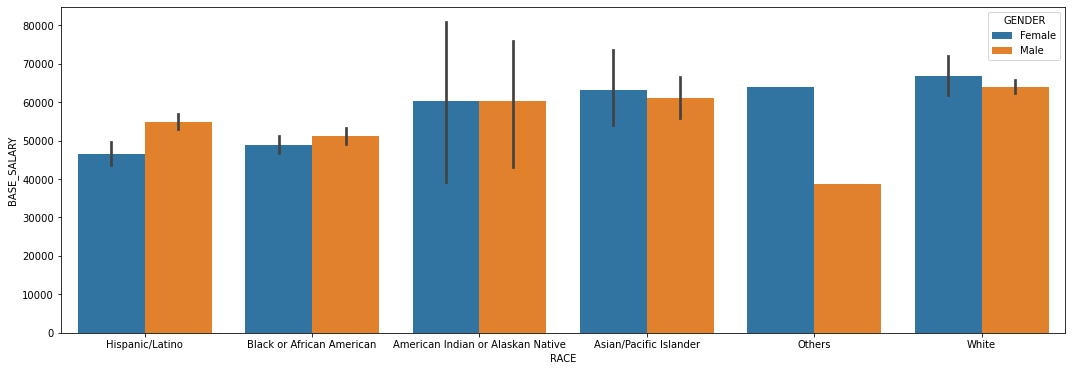

In [117]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='RACE',
            y='BASE_SALARY',
            hue='GENDER',
            ax=ax,
            data=employee,
            order=[
                'Hispanic/Latino', 'Black or African American',
                'American Indian or Alaskan Native', 'Asian/Pacific Islander',
                'Others', 'White'
            ])

<AxesSubplot:xlabel='RACE'>

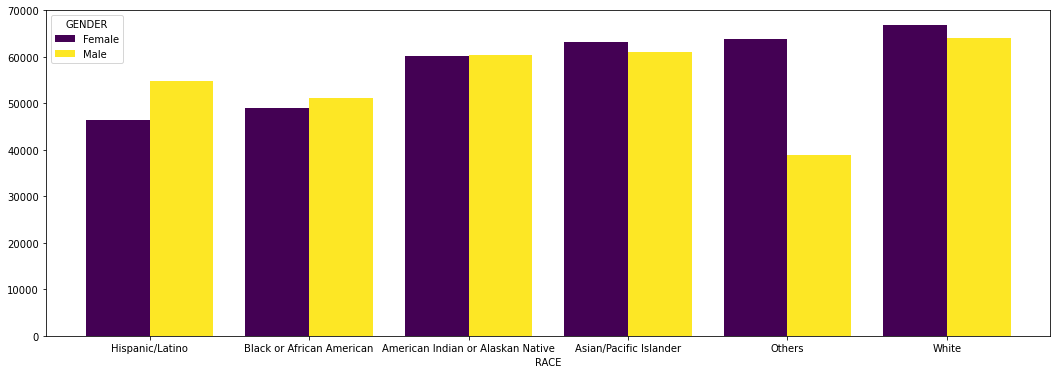

In [118]:
fig, ax = plt.subplots(figsize=(18, 6))
(employee.groupby(['RACE', 'GENDER'],
                  sort=False)['BASE_SALARY'].mean().unstack(
                      'GENDER').sort_values('Female').plot.bar(rot=0,
                                                               ax=ax,
                                                               width=.8,
                                                               cmap='viridis'))

<AxesSubplot:xlabel='GENDER', ylabel='BASE_SALARY'>

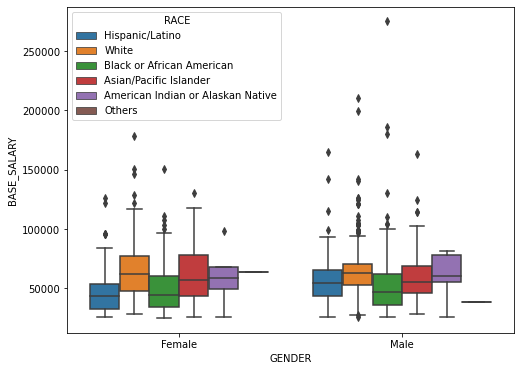

In [119]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', ax=ax)

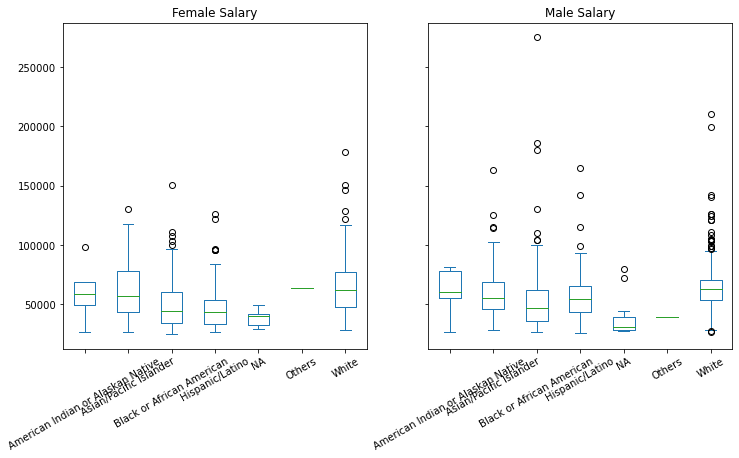

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for g, ax in zip(['Female', 'Male'], axs):
  (employee.query('GENDER == @g').assign(
      RACE=lambda df_: df_.RACE.fillna('NA')).pivot(
          columns='RACE')['BASE_SALARY'].plot.box(ax=ax, rot=30))
  ax.set_title(g + ' Salary')
  ax.set_xlabel('')

## 12.8 使用Seaborn進行多變量分析

In [121]:
emp = pd.read_csv('data/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])


def yrs_exp(df_):
  days_hired = pd.to_datetime('12-1-2016') - df_.HIRE_DATE
  return days_hired.dt.days / 365.25


emp = emp.assign(YEARS_EXPERIENCE=yrs_exp)
emp[['HIRE_DATE', 'YEARS_EXPERIENCE']]

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472279
1,2000-07-19,16.369610
2,2015-02-03,1.826146
3,1982-02-08,34.811773
4,1989-06-19,27.452430
...,...,...
1995,2014-06-09,2.480493
1996,2003-09-02,13.248460
1997,2014-10-13,2.135524
1998,2009-01-20,7.863107


<AxesSubplot:xlabel='YEARS_EXPERIENCE', ylabel='BASE_SALARY'>

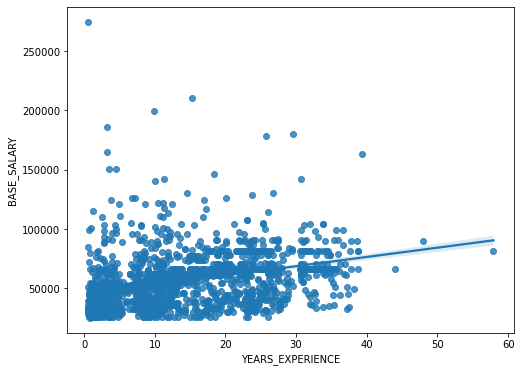

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', data=emp, ax=ax)

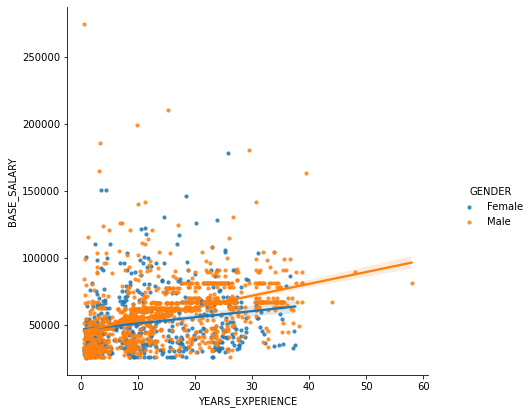

In [123]:
grid = sns.lmplot(x='YEARS_EXPERIENCE',
                  y='BASE_SALARY',
                  hue='GENDER',
                  scatter_kws={'s': 10},
                  data=emp)
grid.fig.set_size_inches(8, 6)

C:\Users\aaronhsu\miniconda38\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


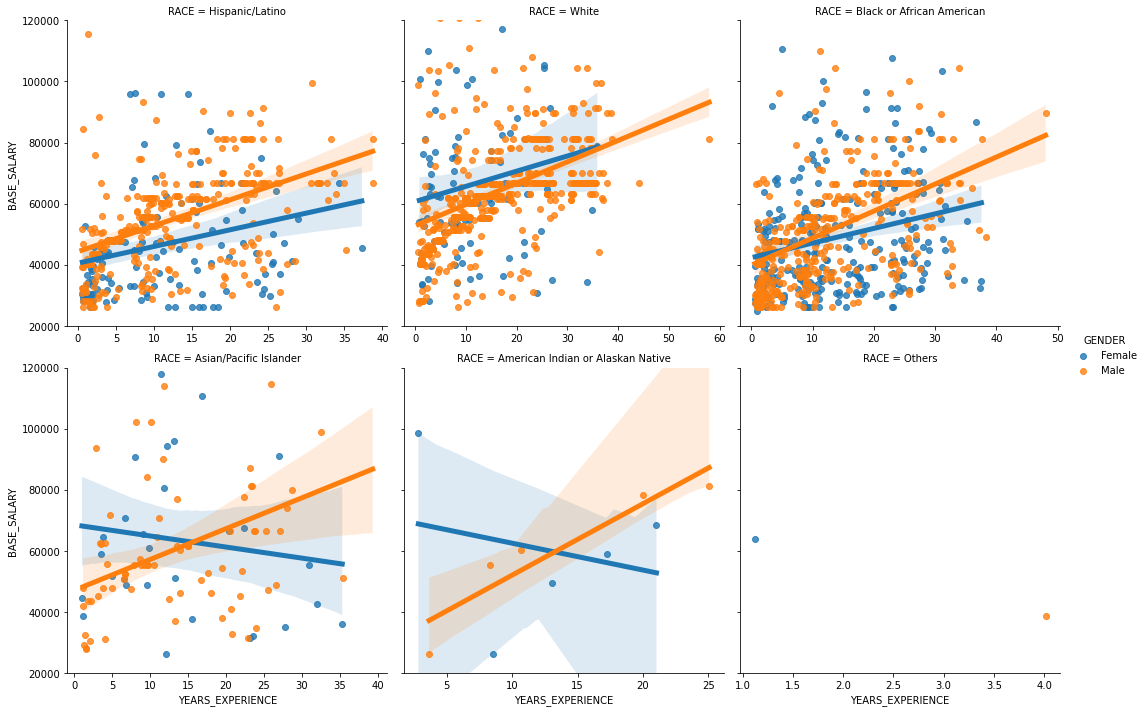

In [124]:
grid = sns.lmplot(x='YEARS_EXPERIENCE',
                  y='BASE_SALARY',
                  hue='GENDER',
                  col='RACE',
                  col_wrap=3,
                  sharex=False,
                  line_kws={'linewidth': 5},
                  data=emp)
grid.set(ylim=(20000, 120000))

In [125]:
deps = emp['DEPARTMENT'].value_counts().index[:2]
deps

Index(['Houston Police Department-HPD', 'Houston Fire Department (HFD)'], dtype='object')

In [126]:
races = emp['RACE'].value_counts().index[:3]
races

Index(['Black or African American', 'White', 'Hispanic/Latino'], dtype='object')

In [127]:
is_dep = emp['DEPARTMENT'].isin(deps)
is_race = emp['RACE'].isin(races)
emp2 = (emp[is_dep & is_race].assign(DEPARTMENT=lambda df_: df_['DEPARTMENT'].
                                     str.extract('(HPD|HFD)', expand=True)))
emp2.shape

(968, 11)

In [128]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [129]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

<AxesSubplot:xlabel='YEARS_EXPERIENCE', ylabel='GENDER'>

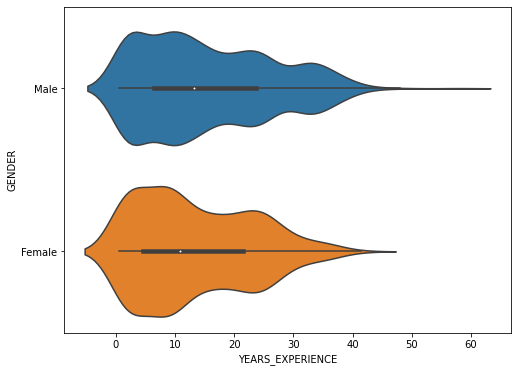

In [130]:
common_depts = (
    emp.groupby('DEPARTMENT').filter(lambda group: len(group) > 50))

fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='YEARS_EXPERIENCE', y='GENDER', data=common_depts)

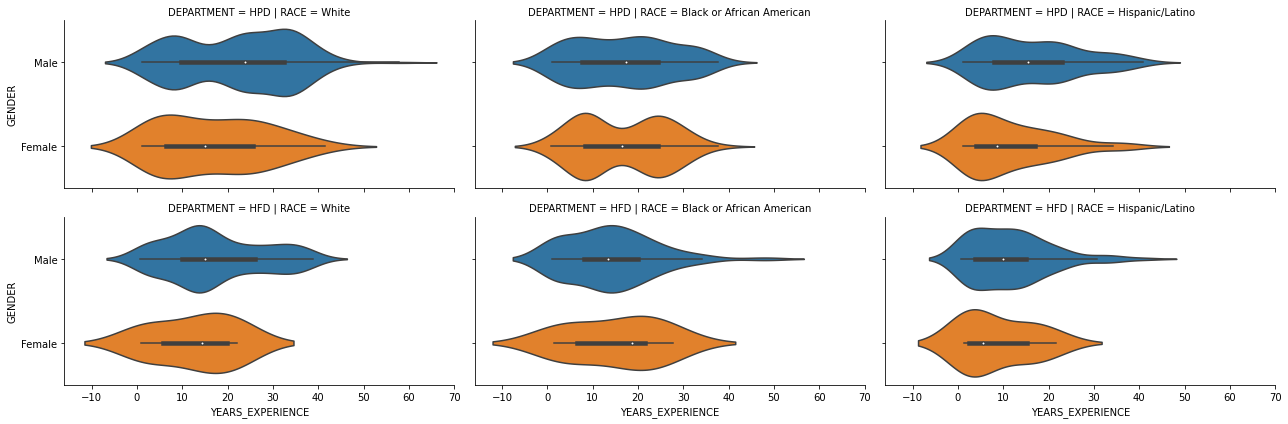

In [131]:
grid = sns.catplot(x='YEARS_EXPERIENCE',
                   y='GENDER',
                   col='RACE',
                   row='DEPARTMENT',
                   height=3,
                   aspect=2,
                   data=emp2,
                   kind='violin')

In [132]:
print('Done!')

Done!
